In [1]:
from keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

C:\Users\Christian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(train_targets[0])
print(train_data[0])

15.2
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [3]:
print("min:   " + str(np.min(train_targets)))
print("max:   " + str(np.max(train_targets)))

min:   5.0
max:   50.0


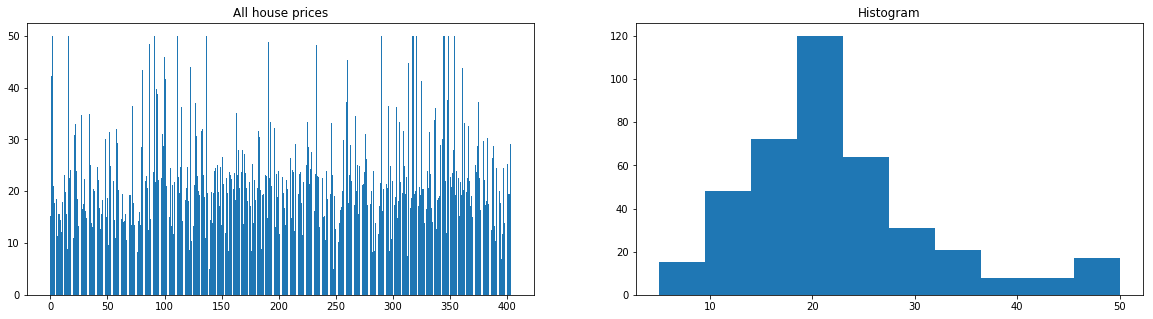

In [4]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.bar(range(404), train_targets)
plt.title("All house prices")

plt.subplot(1, 2, 2)
plt.hist(train_targets);
plt.title("Histogram")

plt.show();

In [5]:
print("min: " + str(np.min(train_data, axis=0)))
print("mean: " + str(np.mean(train_data, axis=0)))
print("std: " + str(np.std(train_data, axis=0)))
print("max: " + str(np.max(train_data, axis=0)))

min: [6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8800e+02 1.2600e+01 3.2000e-01
 1.7300e+00]
mean: [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
std: [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
max: [ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]


We try to normalize per feature. If we would normalize globally, small features (e.g. like body height vs. income) would have a too small impact.

In [6]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() # re-import to ensure we transform once once

mean = train_data.mean(axis=0)
train_data -= mean                # we add 'zero-centeredness'; this makes it easier for the model.
std = train_data.std(axis=0)
train_data /= std                 # we make numbers equally small

test_data -= mean                 # we do not merge train and test data for estimating mean and standard deviation because we
test_data /= std                  # would have information leaks otherwise. We thus use the normalization factors from 
                                  # the train data also for the test data.

print("min: " + str(np.min(train_data, axis=0)))
print("mean: " + str(np.mean(train_data, axis=0)))
print("std: " + str(np.std(train_data, axis=0)))
print("max: " + str(np.max(train_data, axis=0)))

min: [-0.40510053 -0.48361547 -1.56469648 -0.25683275 -1.47126853 -3.81725032
 -2.36904226 -1.28750316 -0.97156928 -1.31131055 -2.67375227 -3.77110135
 -1.51966384]
mean: [-1.01541438e-16  1.09923072e-17  1.80933376e-15 -7.80453809e-17
 -5.25047552e-15  6.43187374e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.05526149e-16  2.36614908e-14  5.96710525e-15
  6.13920356e-16]
std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
max: [9.23484718 3.72899018 2.44537425 3.89358447 2.67733525 3.46718635
 1.11048828 3.43740568 1.67588577 1.83609694 1.60353052 0.44807713
 3.48201936]


In [7]:
column_names = ["Per capita crime rate", "The proportion of residential land zoned for lots over 25000 square feet", "The proportion of non-retail business acres per town", "Charles River dummy variable", "Nitric oxides concentration (parts per 10 million)", "The average number of rooms per dwelling", "The proportion of owner-occupied units built before 1940", "Weighted distances to five Boston employment centers", "Index of accessibility to radial highways", "Full-value property-tax rate per 10000", "Pupil-teacher ratio by town", "1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town", "Percentage lower status of the population"]
print(column_names)

['Per capita crime rate', 'The proportion of residential land zoned for lots over 25000 square feet', 'The proportion of non-retail business acres per town', 'Charles River dummy variable', 'Nitric oxides concentration (parts per 10 million)', 'The average number of rooms per dwelling', 'The proportion of owner-occupied units built before 1940', 'Weighted distances to five Boston employment centers', 'Index of accessibility to radial highways', 'Full-value property-tax rate per 10000', 'Pupil-teacher ratio by town', '1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town', 'Percentage lower status of the population']


#### K-Fold-Cross-Validation
404 = 2 x 2 x 101; as we want several folds, we rather take 4 x 101

```
 -----------------------------------------------------------------
 |     V       |      T        |      T       |        T         |
 -----------------------------------------------------------------
    [0:101]                        [101:404]

 -----------------------------------------------------------------
 |     T       |      V        |      T       |        T         |
 -----------------------------------------------------------------

 -----------------------------------------------------------------
 |     T       |      T        |      V       |        T         |
 -----------------------------------------------------------------

 -----------------------------------------------------------------
 |     T       |      T        |      T       |        V         |
 -----------------------------------------------------------------
                    [0:303]                          [303:404] 
 
 ```

We run it four times and then take the one with the best loss


> This is a 4-Fold-Cross-Validation

In [8]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(
        64,                                         # this makes it possible to create artificial new features
        activation="relu", 
        input_shape=(train_data.shape[1],)          # this is a bit more elegant
    ))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))                      # if we do not put anything: we just have a linear activation (identity)
    model.compile(
        optimizer="rmsprop",
        loss="mse"  ,                               # difference loss and metric: the optimizer looks at the loss; we look
        metrics = ["mae"]                           # at the metric (typically accuracy). Here we use mse (=mean squared error).
    )                                               # For the metric we use mae (mean absolute error), defined as
    return model                                    # mae = abs(pred - true) / n. This is much easier to interpret.

test_model = build_model()
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
k = 4
num_val_samples = len(train_data) // k              # integer division
num_epochs = 500

all_scores = []
all_histories = []
all_models = []

for i in range(k):
    print("Fold:", str(i + 1))
    
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
    
    train_data_left = train_data[:i * num_val_samples]
    train_data_right = train_data[(i + 1) * num_val_samples:]
    partial_train_data = np.concatenate(
        [train_data_left, train_data_right],        # exercise: try slicing out validation set
        axis=0
    )
    
    train_targets_left = train_targets[:i * num_val_samples]
    train_targets_right = train_targets[(i + 1) * num_val_samples:]
    partial_train_targets = np.concatenate(
        [train_targets_left, train_targets_right],
        axis=0
    )
    
    model = build_model()
    history = model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs,
        batch_size=1,                               # as we have only a very small data set
        verbose=0,
        validation_data = (val_data, val_targets)
    )
    #model.save(str(i + 1) + "-model.h5")           # this would save the model as a file
    #models.load_model("i-model.h5")                # this would load the model again (would need to be done outside, of course)
    val_mse, val_mae = model.evaluate(val_data, val_targets)
    
    all_scores.append(val_mae)
    all_histories.append(history)
    all_models.append(model)

print("\n")
for i in range(len(all_scores)):
    print("Fold " + str(i) + ": mae = " + str(round(all_scores[i], 2)))

Fold: 1
101/101 [==============================] - 0s 40us/step
Fold: 2
101/101 [==============================] - 0s 40us/step
Fold: 3
101/101 [==============================] - 0s 69us/step
Fold: 4
101/101 [==============================] - 0s 49us/step


Fold 0: mae = 2.22
Fold 1: mae = 2.4
Fold 2: mae = 2.64
Fold 3: mae = 2.55


In [10]:
print(str(all_histories[1].history.keys()))

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


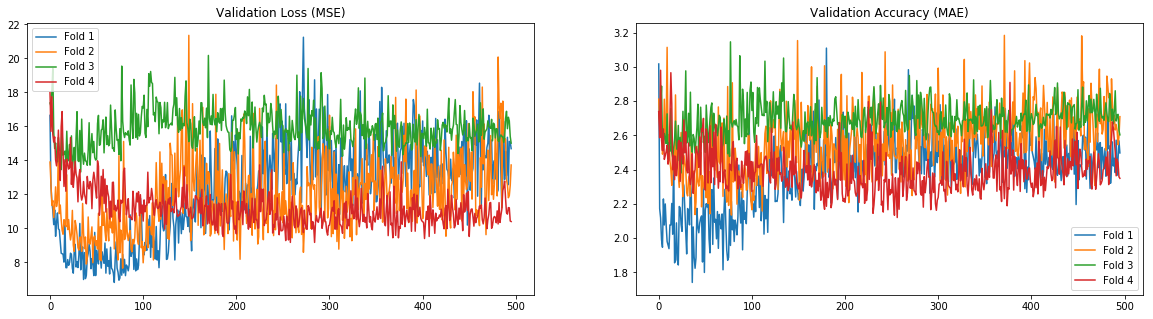

In [19]:
plt.figure(figsize=(20, 5))
for i, history in enumerate(all_histories):

    plt.subplot(1, 2, 1)
    plt.plot(history.history['val_loss'][4:], label="Fold " + str(i+1))        # we start at the fourth batch only to remove the
    plt.legend()                                                               # largest value at the beginning
    plt.title("Validation Loss (MSE)")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_mean_absolute_error'][4:], label="Fold " + str(i+1));
    plt.title("Validation Accuracy (MAE)")
    plt.legend()

plt.show();

We would take the model with the lowest validation loss and accuracy, i.e. fold 4 in our case.

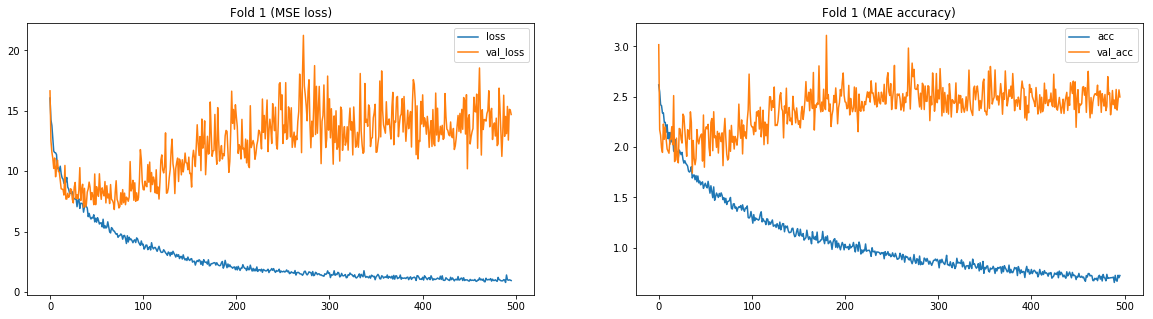

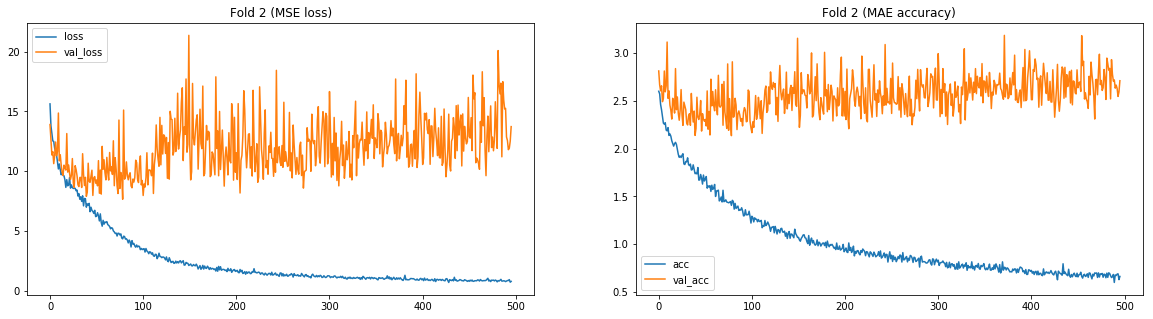

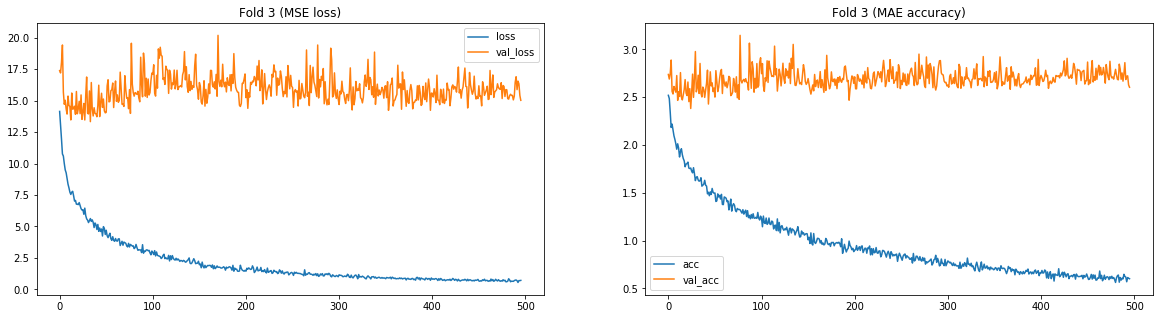

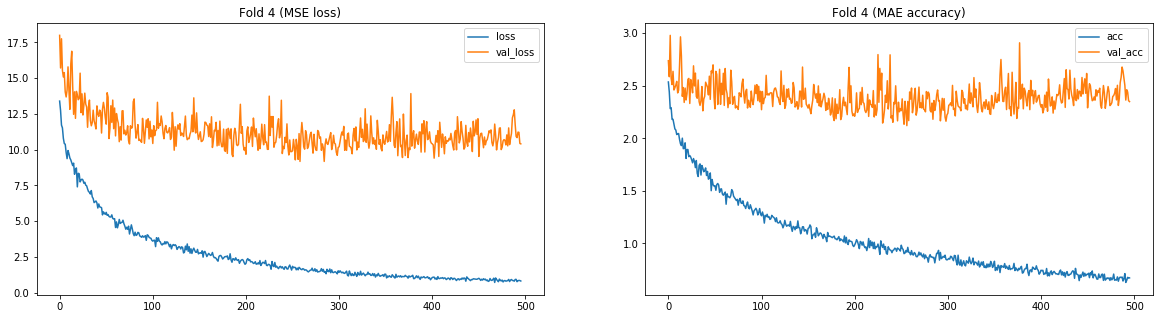

In [14]:
for i, history in enumerate(all_histories):

    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'][4:], label="loss")
    plt.plot(history.history['val_loss'][4:], label="val_loss")
    plt.legend()
    plt.title("Fold " + str(i + 1) + " (MSE loss)")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'][4:], label="acc");
    plt.plot(history.history['val_mean_absolute_error'][4:], label="val_acc");
    plt.title("Fold " + str(i + 1) + " (MAE accuracy)")
    plt.legend()

    plt.show();

In [13]:
for i in range(len(all_scores)):
    print("Fold " + str(i) + ": mae = " + str(round(all_scores[i], 2)))

Fold 0: mae = 2.5
Fold 1: mae = 2.71
Fold 2: mae = 2.6
Fold 3: mae = 2.35
